 **The variables in the data set:**

**Suburb:** Konutun bulunduğu banliyö veya mahalle bilgisi.

**Address:** Konutun tam adresi.

**Rooms:** Konutta bulunan oda sayısı.

**Price:** Konutun fiyatı Avustralya doları cinsinden.

**Method:** Konutun satış yöntemi;

-satıldıysa "S,"

-daha önceden satıldıysa "SP,"

-devredildiyse "PI,"

-açık artırma öncesi satıldıysa "PN,"

-satış fiyatı açıklanmadıysa "SN,"

-teklif yoksa "NB,"

-satıcı tarafından teklif verildiyse "VB,"

-açık artırmadan önce çekildiyse "W,"

-açık artırmadan sonra satıldıysa "SA,"

-açık artırmadan sonra satış fiyatı açıklanmadıysa "SS,"

-fiyat veya en yüksek teklif bilgisi yoksa "N/A."


**Type:** Konut tipi;

-yatak odaları (br),

-ev. villa (h),

-dubleks (u),

-şehir evi (t),

-geliştirme alanı (dev site),

-diğer konut (o res).

**SellerG:** Emlak acentesi veya satıcı.

**Date:** Konutun satıldığı tarih.

**Distance:** CBD'ye (Central Business District - Merkezi İş Bölgesi) uzaklık, kilometre cinsinden.

**Regionname:** Genel bölge bilgisi (Batı, Kuzey Batı, Kuzey, Kuzeydoğu, vb.).

**Propertycount:** Konutun bulunduğu banliyö veya mahallede bulunan toplam konut sayısı.

**Bedroom2:** Başka bir kaynaktan alınan yatak odası sayısı bilgisi.

**Bathroom:** Banyo sayısı.

**Car:** Konutun park alanında kaç araçlık kapasite olduğu.

**Landsize:** Arazi büyüklüğü metre cinsinden.

**BuildingArea:** Bina alanı metre cinsinden.

**YearBuilt:** Konutun inşa edildiği yıl.

**CouncilArea:** Konutun bulunduğu bölgeyi yöneten konsey veya belediye bilgisi.

**Lattitude:** Konutun enlem koordinatı.

**Longtitude:** Konutun boylam koordinatı.

# **Importing Required Libraries**

In [286]:
# gerekli kütüphanelerin içe aktarımı
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # görselleştirme için kullanıldı
import seaborn as sns # görselleştirme için kullanıldı (daha estetik, bilgilendirici)
from sklearn import model_selection
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors

# **Gathering and Observing Data**

In [349]:
# veri setinin okutulması, yedeklenmesi, yazdırılması
melbourne = pd.read_csv("Melbourne_housing_FULL.csv")
df = melbourne.copy()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [350]:
#satır, sütun sayısını inceliyoruz
df.shape

(34857, 21)

In [351]:
#veri seti bilgisini ediniyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [352]:
# temel istatistiksel özetleri inceleyelim
from pandas.core.internals.base import T
df.describe().T  # T ile sonuçları transpoz hale getirip okunaklılık kazandırdık

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


#**Exploratory Data Analysis (EDA)**

In [353]:
# değişkenlerin kaç alt başlığa ayrılmış bakalım
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

**Duplicate Data**

In [354]:
# yinelenen örnek var mı diye bakalım
df.duplicated().sum()

1

In [355]:
#tekrarlanan veri hangisi diye bakalım
duplicate = df[df.duplicated(keep=False)]
print(duplicate)

           Suburb        Address  Rooms Type  Price Method SellerG  \
15857  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15857  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15857         226.0     2000.0  Manningham City Council -37.82678   145.16777   
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15857  Eastern Metropolitan        4973.0  
15858  Eastern Metropolitan        4973.0  

[2 rows x 21 columns]


In [356]:
# 15857. örnek kaldıralım
df.drop(index = [15857], inplace = True)

**Missing Values**

In [357]:
#sütunlarda eksik veri var mı kontrolü yapıyoruz
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Çok fazla boş veri olduğunu görüyoruz.
Numerical değişkenleri median methodu ile categorical değişkenleri ise mode methodu ile dolduralım.

In [358]:
# categorical ve numerical olacak şekilde değişkenleri ayırıyoruz
categorical_features = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
numerical_features = ['Rooms','Price', 'Distance','Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

In [359]:
# categorical değişkenleri mode methodu ile dolduralım
for CouncilArea in categorical_features:
 df[CouncilArea] = df[CouncilArea].fillna(df[CouncilArea].mode().iloc[0])

for Regionname in categorical_features:
 df[Regionname] = df[Regionname].fillna(df[Regionname].mode().iloc[0])

Postcode ve distance için kayıp veri sayısı çok az olduğu ve çoğu doğru veri olduğu için eksik olan yerleri elle girelim.

In [360]:
# posta kodu eksik olan yeri bulalım
df.loc[np.isnan(df["Postcode"])]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN


In [361]:
# Eksik posta kodunu bulduğunuz satırın indeksini alalım
eksik_posta_kodu_indeksi = df.index[df["Postcode"].isna()].tolist()

# Eksik posta kodunu girelim
eksik_posta_kodu = 3060

# Eksik posta kodunu eksik olan satıra ekleyinekleyelim
df.loc[eksik_posta_kodu_indeksi, "Postcode"] = eksik_posta_kodu

In [362]:
# tekrar bakalım
df.loc[np.isnan(df["Postcode"])]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


Posta kodundaki eksiklik doldu. Aynı işlemi Distance için de yapalım.


In [363]:
df.loc[np.isnan(df["Distance"])]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,3060.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN


In [364]:
# Eksik mesafenin satırın indeksini alalım
eksik_mesafe_indeksi = df.index[df["Distance"].isna()].tolist()

# Eksik mesafeyi kaggledan araştırıp girelim
eksik_mesafe = 13.1

# Eksik mesafeyi eksik olan satıra ekleyelim
df.loc[eksik_mesafe_indeksi, "Distance"] = eksik_mesafe

In [365]:
df.loc[np.isnan(df["Distance"])]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [366]:
# numerical değişkenleri median ve mode methodu ile dolduralım
for Price in numerical_features:
 df[Price] = df[Price].fillna(df[Price].median())

for Bedroom2 in numerical_features:
 df[Bedroom2] = df[Bedroom2].fillna(df[Bedroom2].median())

for Bathroom in numerical_features:
 df[Bathroom] = df[Bathroom].fillna(df[Bathroom].mode().iloc[0])

for Car in numerical_features:
 df[Car] = df[Car].fillna(df[Car].mode().iloc[0])

for Landsize in numerical_features:
 df[Landsize] = df[Landsize].fillna(df[Landsize].median())

for BuildingArea in numerical_features:
 df[BuildingArea] = df[BuildingArea].fillna(df[BuildingArea].median())

for YearBuilt in numerical_features:
 df[YearBuilt] = df[YearBuilt].fillna(df[YearBuilt].median())

for Lattitude in numerical_features:
 df[Lattitude] = df[Lattitude].fillna(df[Lattitude].median())

for Longtitude in numerical_features:
 df[Longtitude] = df[Longtitude].fillna(df[Longtitude].median())


In [367]:
# tekrar boş değerlere bakalım
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Artık boş veri yok. Veri kümesine tekrar bakalım.


In [368]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,2.0,2.0,521.0,136.0,1970.0,Maribyrnong City Council,-37.80760,145.00780,Western Metropolitan,6543.0


**Outlier Data**

In [369]:
# temel istatistiksel özelliklere de tekrar bakalım
from pandas.core.internals.base import T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.0000,3.0000,4.000000e+00,1.600000e+01
Price,34856.0,1.010842e+06,572006.858531,85000.00000,695000.0000,870000.0000,1.150000e+06,1.120000e+07
Distance,34856.0,1.118486e+01,6.788863,0.00000,6.4000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116061e+03,109.024287,3000.00000,3051.0000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,34856.0,3.064695e+00,0.858102,0.00000,3.0000,3.0000,3.000000e+00,3.000000e+01
Bathroom,34856.0,1.713306e+00,0.652727,0.00000,1.0000,2.0000,2.000000e+00,1.200000e+01
Car,34856.0,1.796735e+00,0.882981,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,34856.0,5.690062e+02,2763.947240,0.00000,357.0000,521.0000,5.980000e+02,4.330140e+05
BuildingArea,34856.0,1.455605e+02,252.225894,0.00000,136.0000,136.0000,1.360000e+02,4.451500e+04
YearBuilt,34856.0,1.967898e+03,25.041817,1196.00000,1970.0000,1970.0000,1.970000e+03,2.106000e+03


Standart sapmaları düşürsekde hala daha aykırı değerler mevcut gözüküyor.


count    34856.000000
mean         3.031013
std          0.969947
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64


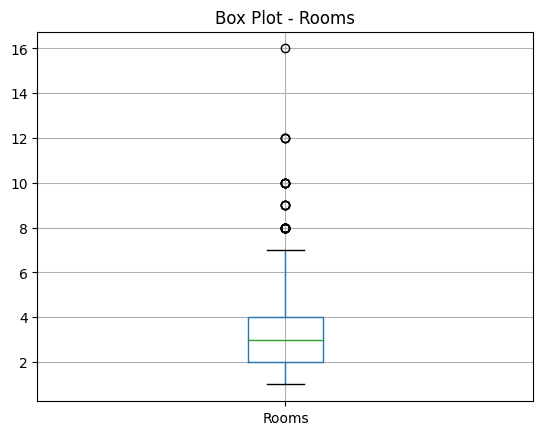

count    3.485600e+04
mean     1.010842e+06
std      5.720069e+05
min      8.500000e+04
25%      6.950000e+05
50%      8.700000e+05
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64


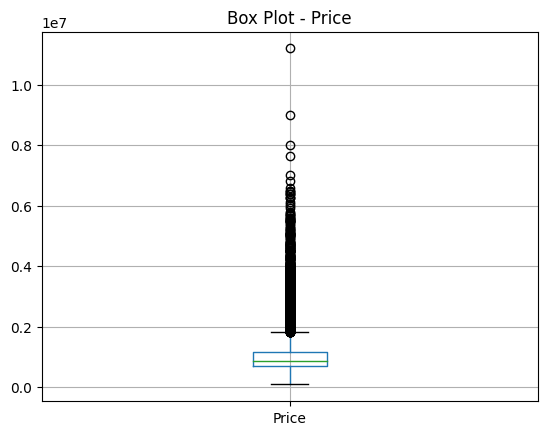

count    34856.000000
mean        11.184863
std          6.788863
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64


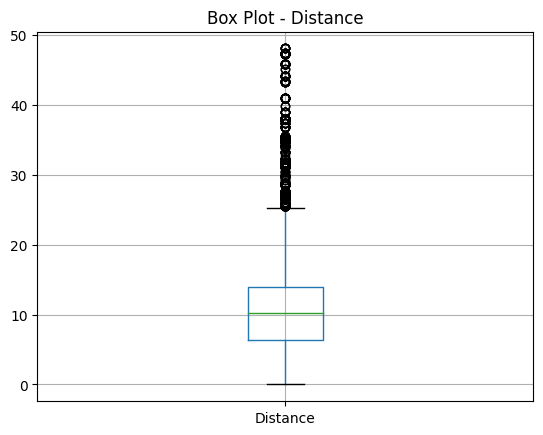

count    34856.000000
mean      3116.060822
std        109.024287
min       3000.000000
25%       3051.000000
50%       3103.000000
75%       3156.000000
max       3978.000000
Name: Postcode, dtype: float64


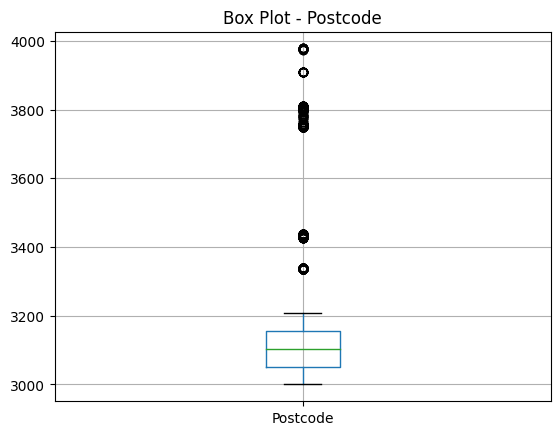

count    34856.000000
mean         3.064695
std          0.858102
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         30.000000
Name: Bedroom2, dtype: float64


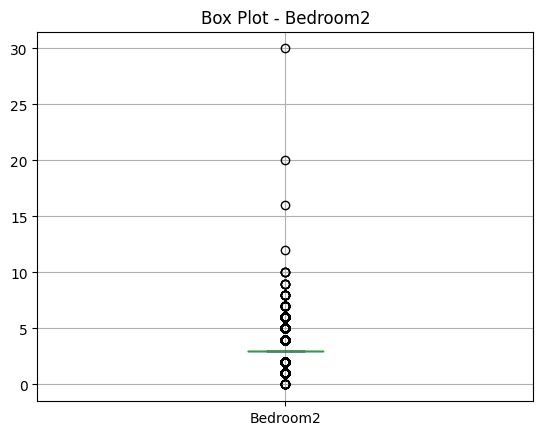

count    34856.000000
mean         1.713306
std          0.652727
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64


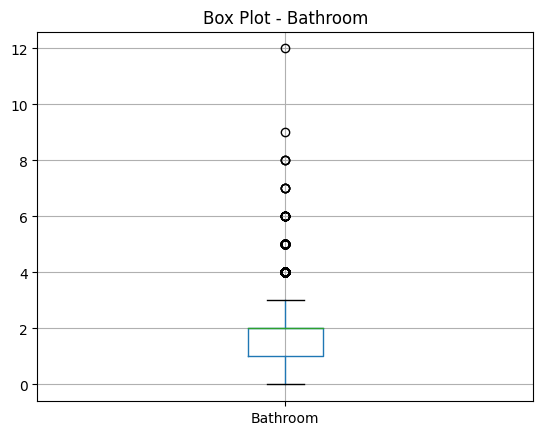

count    34856.000000
mean         1.796735
std          0.882981
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64


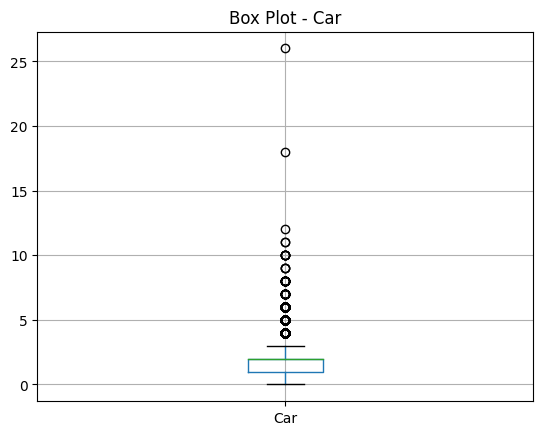

count     34856.000000
mean        569.006226
std        2763.947240
min           0.000000
25%         357.000000
50%         521.000000
75%         598.000000
max      433014.000000
Name: Landsize, dtype: float64


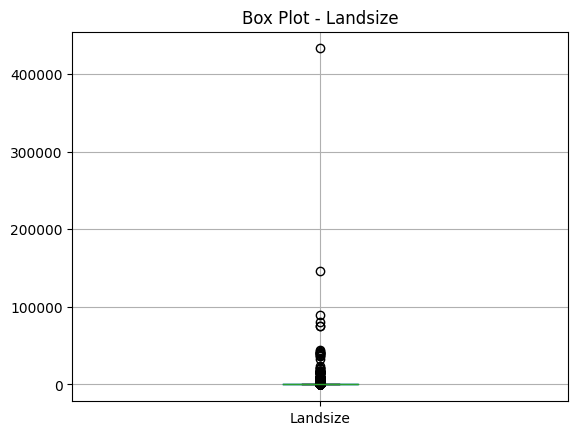

count    34856.000000
mean       145.560519
std        252.225894
min          0.000000
25%        136.000000
50%        136.000000
75%        136.000000
max      44515.000000
Name: BuildingArea, dtype: float64


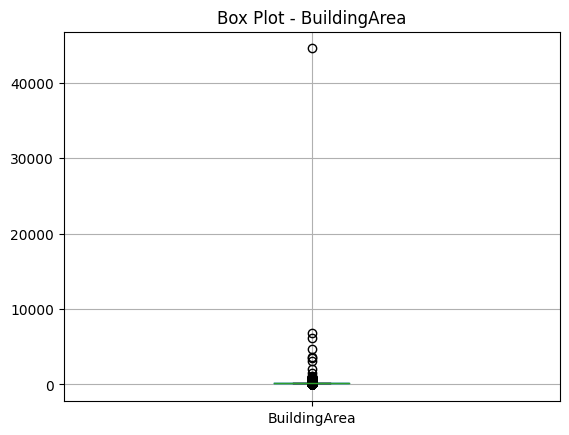

count    34856.000000
mean      1967.897722
std         25.041817
min       1196.000000
25%       1970.000000
50%       1970.000000
75%       1970.000000
max       2106.000000
Name: YearBuilt, dtype: float64


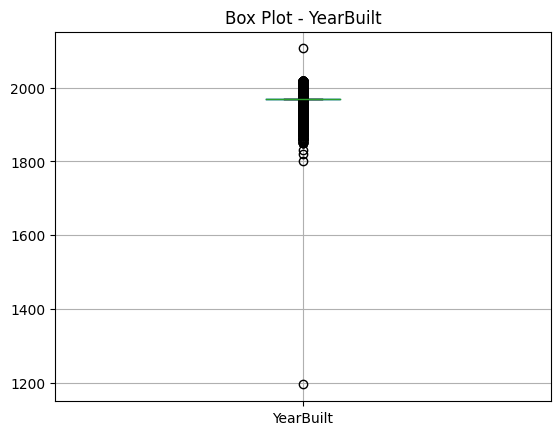

count    34856.000000
mean       -37.809940
std          0.079291
min        -38.190430
25%        -37.846900
50%        -37.807600
75%        -37.770897
max        -37.390200
Name: Lattitude, dtype: float64


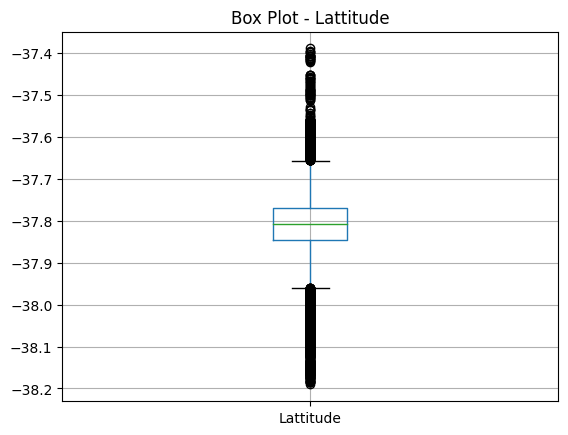

count    34856.000000
mean       145.003208
std          0.105555
min        144.423790
25%        144.964400
50%        145.007800
75%        145.051742
max        145.526350
Name: Longtitude, dtype: float64


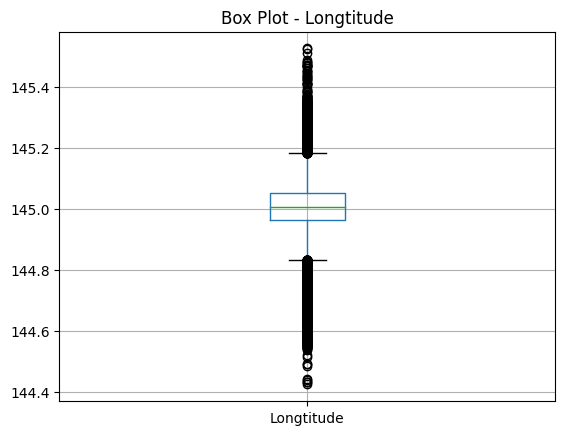

count    34856.000000
mean      7572.893189
std       4427.947745
min         83.000000
25%       4385.000000
50%       6763.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64


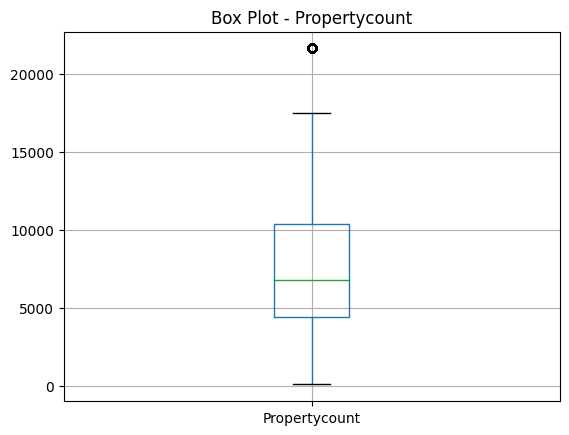

In [370]:
# aykırı değerlerin aralıklarını net olarak görmek için box plot çizdirelim
# sayısal değişkenleri seçelim
numeric_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Aykırı değerleri tanımlamak için bir döngü kullanalım
for column in numeric_columns:
    # Değişkenin istatistiksel özetini görelim
    print(df[column].describe())

    # Box plot ile değişkenin dağılımını görselleştirelim
    df.boxplot(column=column)
    plt.title(f'Box Plot - {column}')
    plt.show()

In [371]:
# Z-score ile aykırı değerleri bulalım
def Zscore_outlier(column, threshold=3):
    # Sütunun ortalamasını ve standart sapmasını hesaplayalım
    m = column.mean()
    sd = column.std()

    outliers = column[(abs((column - m) / sd) > threshold)]

    return outliers

numeric_columns = [ 'Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount' ]

for column in numeric_columns:
    column_outliers = Zscore_outlier(df[column])
    if not column_outliers.empty:
        print(f"Aykırı Değerler ({column}):\n", column_outliers)


Aykırı Değerler (Rooms):
 81       6
175      7
426      6
496      6
538      6
        ..
34212    6
34367    6
34412    6
34494    6
34770    6
Name: Rooms, Length: 269, dtype: int64
Aykırı Değerler (Price):
 135      2850000.0
166      3010000.0
168      2800000.0
178      4735000.0
182      3755000.0
           ...    
34494    5575000.0
34496    3750000.0
34498    3250000.0
34529    2760000.0
34714    2855000.0
Name: Price, Length: 671, dtype: float64
Aykırı Değerler (Distance):
 14263    35.2
14313    43.4
14326    34.7
14357    36.9
14383    38.0
         ... 
34751    31.7
34752    31.7
34753    31.7
34754    31.7
34809    44.2
Name: Distance, Length: 792, dtype: float64
Aykırı Değerler (Postcode):
 14263    3806.0
14313    3978.0
14326    3977.0
14345    3754.0
14357    3782.0
          ...  
34846    3750.0
34847    3750.0
34848    3750.0
34849    3750.0
34850    3750.0
Name: Postcode, Length: 558, dtype: float64
Aykırı Değerler (Bedroom2):
 13       6.0
81       6.0
175    

**Z-score**

In [372]:
# değişkenlerin kaç değeri aykırıymış sayısını öğrenenlim
def Zscore_outlier_count(column, threshold=3):
    # Sütunun ortalamasını ve standart sapmasını hesaplayalım
    m = column.mean()
    sd = column.std()

    outliers = column[(abs((column - m) / sd) > threshold)]

    return len(outliers)

numeric_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

for column in numeric_columns:
    count = Zscore_outlier_count(df[column])
    print(f"Aykırı Değer Sayısı ({column}): {count}")

Aykırı Değer Sayısı (Rooms): 269
Aykırı Değer Sayısı (Price): 671
Aykırı Değer Sayısı (Distance): 792
Aykırı Değer Sayısı (Postcode): 558
Aykırı Değer Sayısı (Bedroom2): 241
Aykırı Değer Sayısı (Bathroom): 371
Aykırı Değer Sayısı (Car): 353
Aykırı Değer Sayısı (Landsize): 58
Aykırı Değer Sayısı (BuildingArea): 17
Aykırı Değer Sayısı (YearBuilt): 718
Aykırı Değer Sayısı (Lattitude): 488
Aykırı Değer Sayısı (Longtitude): 622
Aykırı Değer Sayısı (Propertycount): 844


Aykırı değerleri sınırlama yöntemi ile dolduralım. Veri setini inceleyip kendi yorumumu da katarak alt ve üst sınırlar belirleyeceğim. Lattitude, Longtitude ve Prooertycount ile ilgilenmeyeceğim. Herbir değişken için kaggledaki veri setini kontrol ettim ve bazı aykırılıklarının sebebinin insan kaynaklı olduğunu gördüm. Örneğin price verisini girerken bir 0 fazla veya eksik girilmiş olabilir dedim ve buna göre bi sınırlama oluşturdum.

In [373]:
# Rooms değişkeni için sınırlar
rooms_lower_limit = 1
rooms_upper_limit = 7
df['Rooms'] = np.where(df['Rooms'] < rooms_lower_limit, rooms_lower_limit, np.where(df['Rooms'] > rooms_upper_limit, rooms_upper_limit, df['Rooms']))

# Price değişkeni için sınırlar
price_lower_limit = 130000.00
price_upper_limit = 2300000.00
df['Price'] = np.where(df['Price'] < price_lower_limit, price_lower_limit, np.where(df['Price'] > price_upper_limit, price_upper_limit, df['Price']))

# Distance değişkeni için sınırlar
distance_lower_limit = 0.00
distance_upper_limit = 20.00
df['Distance'] = np.where(df['Distance'] < distance_lower_limit, distance_lower_limit, np.where(df['Distance'] > distance_upper_limit, distance_upper_limit, df['Distance']))

# Postcode değişkeni için sınırlar
postcode_lower_limit = 3000
postcode_upper_limit = 3250
df['Postcode'] = np.where(df['Postcode'] < postcode_lower_limit, postcode_lower_limit, np.where(df['Postcode'] > postcode_upper_limit, postcode_upper_limit, df['Postcode']))

# Bedroom2 değişkeni için sınırlar
bedroom2_lower_limit = 0.00
bedroom2_upper_limit = 5.00
df['Bedroom2'] = np.where(df['Bedroom2'] < bedroom2_lower_limit, bedroom2_lower_limit, np.where(df['Bedroom2'] > bedroom2_upper_limit, bedroom2_upper_limit, df['Bedroom2']))

# Bathroom değişkeni için sınırlar
bathroom_lower_limit = 0.00
bathroom_upper_limit = 3.00
df['Bathroom'] = np.where(df['Bathroom'] < bathroom_lower_limit, bathroom_lower_limit, np.where(df['Bathroom'] > bathroom_upper_limit, bathroom_upper_limit, df['Bathroom']))

# Car değişkeni için sınırlar
car_lower_limit = 0.0
car_upper_limit = 3.0
df['Car'] = np.where(df['Car'] < car_lower_limit, car_lower_limit, np.where(df['Car'] > car_upper_limit, car_upper_limit, df['Car']))

# Landsize değişkeni için sınırlar
landsize_lower_limit = 100.00
landsize_upper_limit = 650.00
df['Landsize'] = np.where(df['Landsize'] < landsize_lower_limit, landsize_lower_limit, np.where(df['Landsize'] > landsize_upper_limit, landsize_upper_limit, df['Landsize']))

# BuildingArea değişkeni için sınırlar
buildingarea_lower_limit = 100.00
buildingarea_upper_limit = 200.00
df['BuildingArea'] = np.where(df['BuildingArea'] < buildingarea_lower_limit, buildingarea_lower_limit, np.where(df['BuildingArea'] > buildingarea_upper_limit, buildingarea_upper_limit, df['BuildingArea']))

# YearBuilt değişkeni için sınırlar
yearbuilt_lower_limit = 1880
yearbuilt_upper_limit = 2018
df['YearBuilt'] = np.where(df['YearBuilt'] < yearbuilt_lower_limit, yearbuilt_lower_limit, np.where(df['YearBuilt'] > yearbuilt_upper_limit, yearbuilt_upper_limit, df['YearBuilt']))

In [374]:
# temel istatistiksel özelliklere de tekrar bakalım
from pandas.core.internals.base import T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.029034,0.958149,1.00000,2.0000,3.0000,4.000000e+00,7.000000e+00
Price,34856.0,983373.314264,455019.925478,130000.00000,695000.0000,870000.0000,1.150000e+06,2.300000e+06
Distance,34856.0,10.565862,5.193232,0.00000,6.4000,10.3000,1.400000e+01,2.000000e+01
Postcode,34856.0,3105.814035,63.502949,3000.00000,3051.0000,3103.0000,3.156000e+03,3.250000e+03
Bedroom2,34856.0,3.054223,0.806008,0.00000,3.0000,3.0000,3.000000e+00,5.000000e+00
Bathroom,34856.0,1.698474,0.599693,0.00000,1.0000,2.0000,2.000000e+00,3.000000e+00
Car,34856.0,1.733016,0.684342,0.00000,1.0000,2.0000,2.000000e+00,3.000000e+00
Landsize,34856.0,464.707195,177.006805,100.00000,357.0000,521.0000,5.980000e+02,6.500000e+02
BuildingArea,34856.0,139.221993,24.972836,100.00000,136.0000,136.0000,1.360000e+02,2.000000e+02
YearBuilt,34856.0,1967.940269,24.586589,1880.00000,1970.0000,1970.0000,1.970000e+03,2.018000e+03


Standart sapmaların baştaki durumuna göre ciddi şekilde azaldığını gözlemleyebiliriz.


# **Data Visualization**

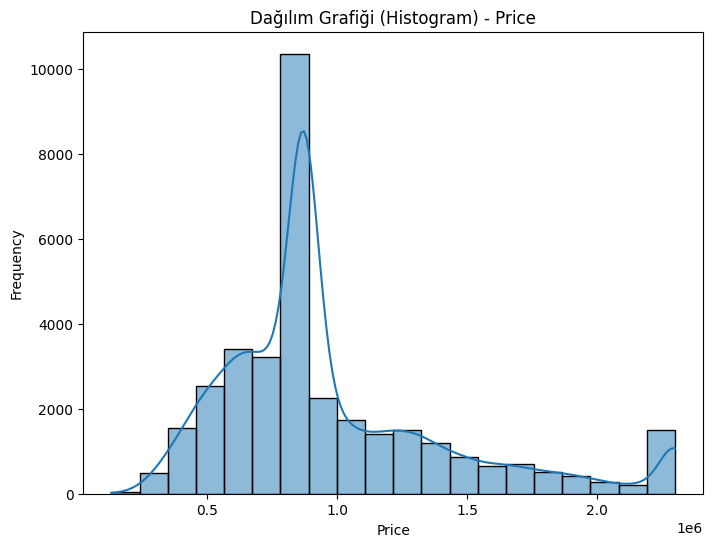

In [375]:
 # 'Price' sütunu için histogramı çiziyoruz
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Dağılım Grafiği (Histogram) - Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

*   Grafiğin sol tarafında fiyatlar düşük seviyelerde yoğundur. Bu, düşük fiyatlı mülklerin sıklıkla bulunduğunu veya temsil edildiğini gösterir.

*   Yaklaşık 0.75 ile 1.00 arasında bir fiyat aralığında, sıklık birdenbire yükselir. Bu, bu fiyat aralığında birçok mülkün bulunduğunu veya yoğun bir şekilde temsil edildiğini gösterir.

*   1.00'dan sonraki fiyat aralığında, sıklık yeniden düşer. Çok fazla aykırı değer olduğu için uçlarda yığılma olmuş.

In [314]:
# numeric değerlerimizin de grafiğini çizdirelim ama öncesinde numeric değerleri tekrar hatırlayalım
numerical_features = ['Rooms','Price', 'Distance','Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


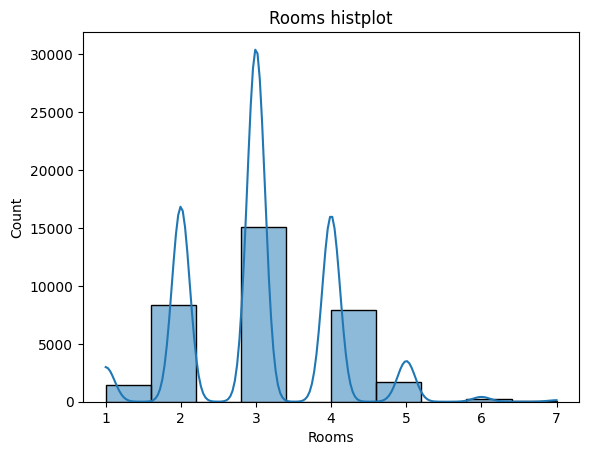

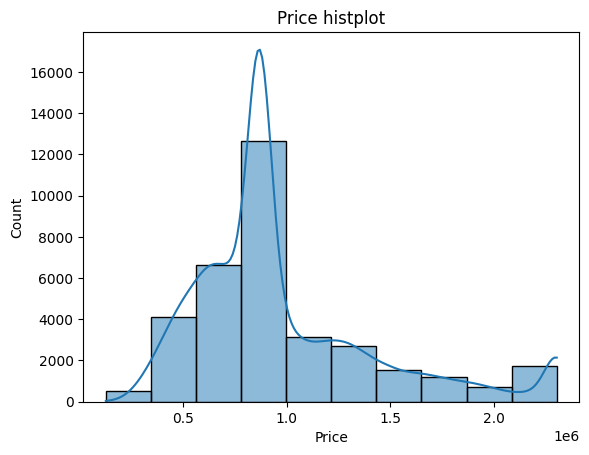

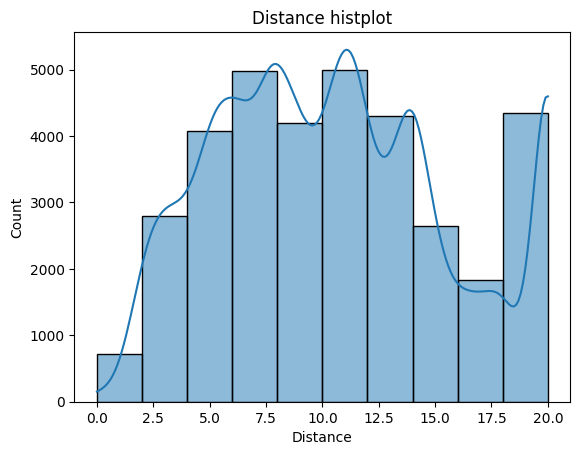

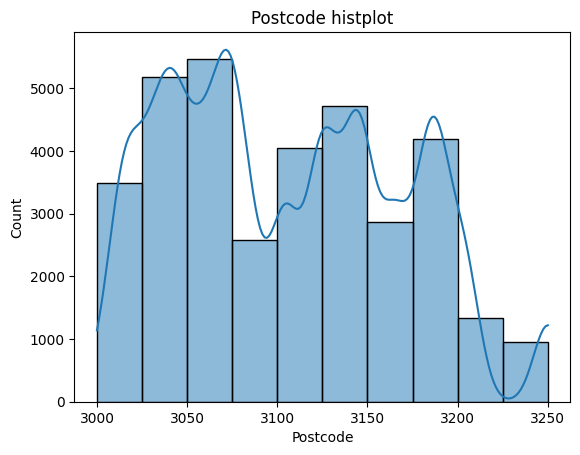

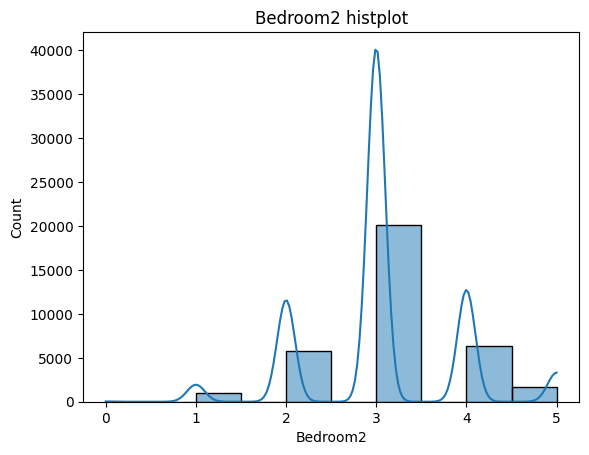

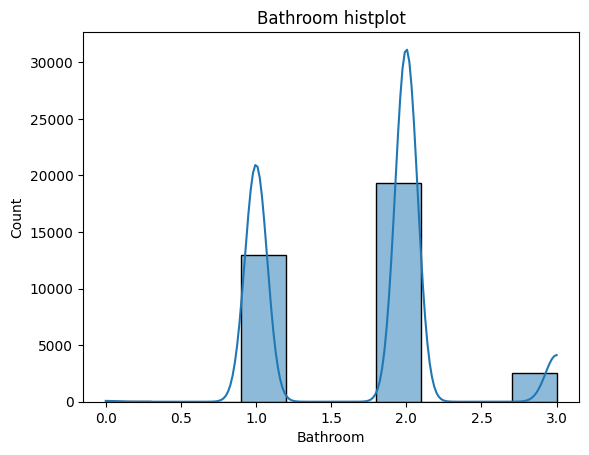

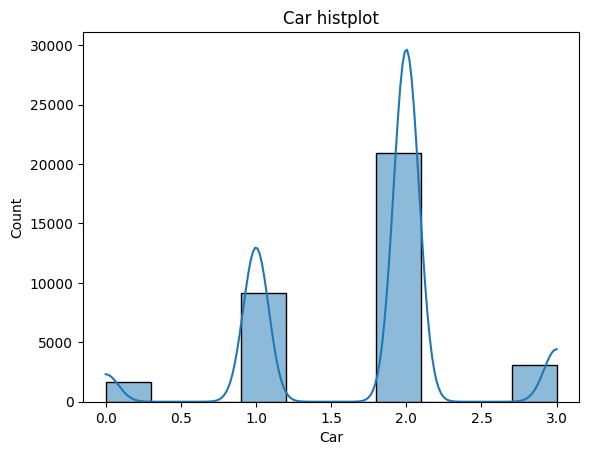

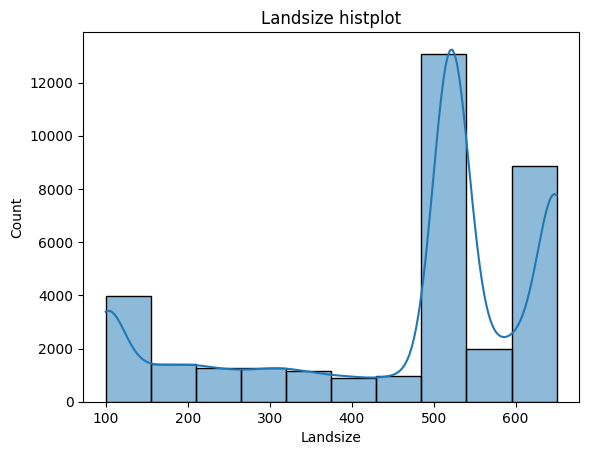

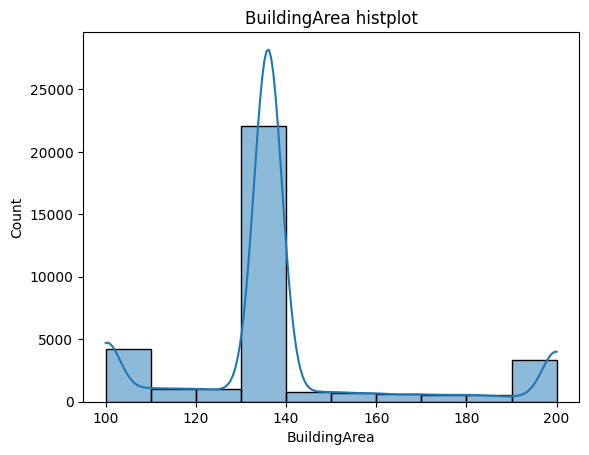

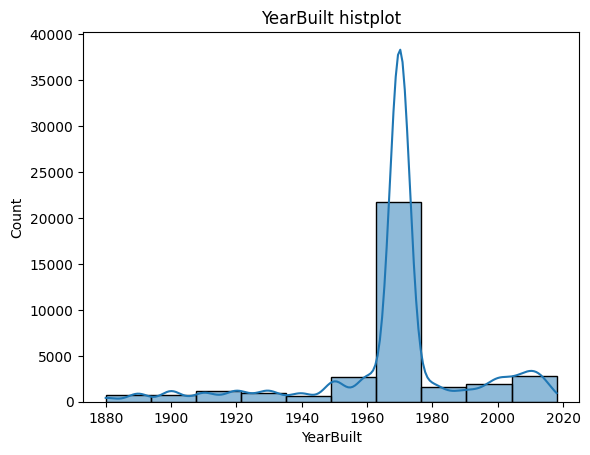

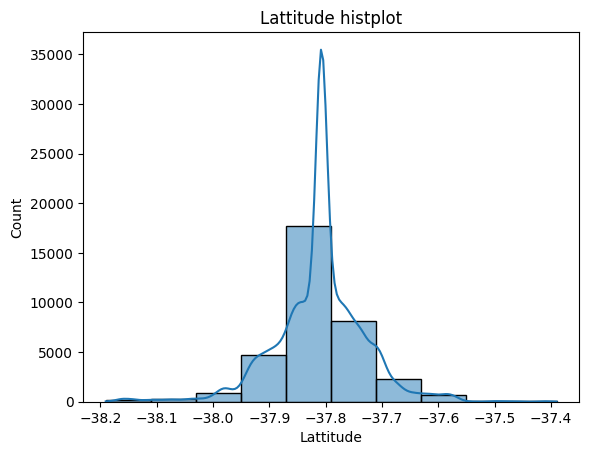

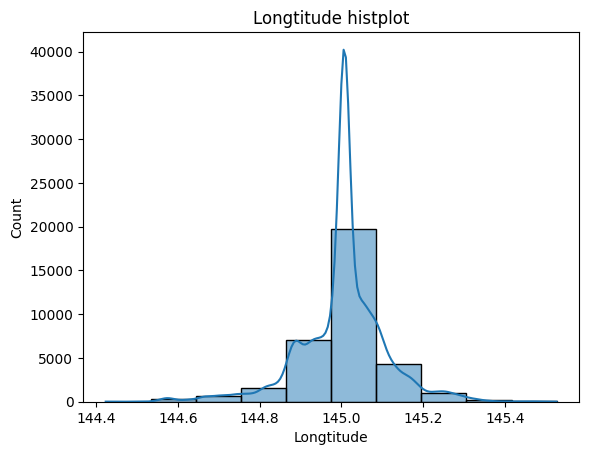

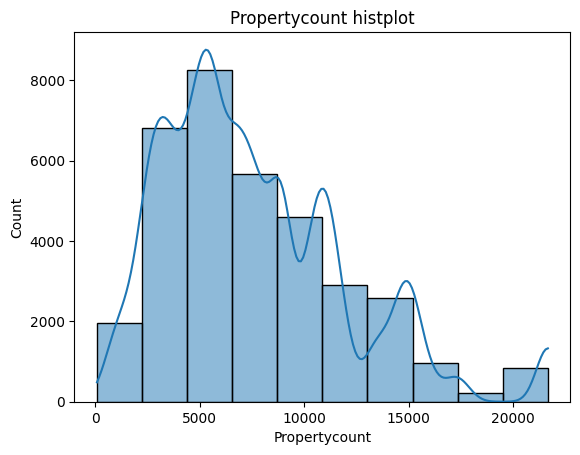

In [315]:
import seaborn as sns
for nf in numerical_features : # bu değişkenler üzerinden işlem yapacak döngü başlattık
    sns.histplot(df[nf], bins=10, kde=True)  # seaborn kütüphanesi kullanılarak dağılım grafiği çizdirdik
    plt.title(f"{nf} histplot")  # grafik başlığını belirledik
    plt.show()

*   **Rooms:** Çoğunluk 3 odalı evlerden oluşmakta. 3'ün peşi sırada 2 ile 4 odalı evler bulunmakta.

*   **Price:** Ortalama fiyattaki evlerin sayısı daha düşük ve yüksek fiyatlı evlere kıyasla fazladır. Fiyat arttıkça ev sayısının da düştüğünü görebilirz.

*   **Dİstance:** Evlerin merkeze uzaklığı ortalama 10km.

*   **Bedroom2:** Farklı kaynaktan edinilmiş yatak odası sayısı 3 civarında yoğunluk göstermiştir.

*   **Bathroom:** Evlerin çoğu 2 veya 1 banyoya sahiptir.

*   **Car:** Evlerin çoğunluğu 2 veya 1 araçlık park yerine sahiptir.

*   **Landsize:** Arazi büyüklüğü verisine baktığımız zamansa 500 ve 600 m^2büyüklüğe sahip arazilerin çoğunlukta olduğunu görüyoruz.

*   **BuildingArea:** Evlerin ortalama 135 m^2 büyüklüğünde olduğunu görüyoruz.

*   **YearBuilt:** Evlerin çoğunluğu 1970'li yıllarda inşa edilmiş.


In [316]:
# categoric değişkenleri tanımlayalım
categorical_features = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [317]:
# bazı değişkenlerde çok fazla değer olduğu için grafikte sorun çıktığından daha anlamlılarını alalım sadece
categorical_features2 = ['Type', 'Method', 'Regionname']

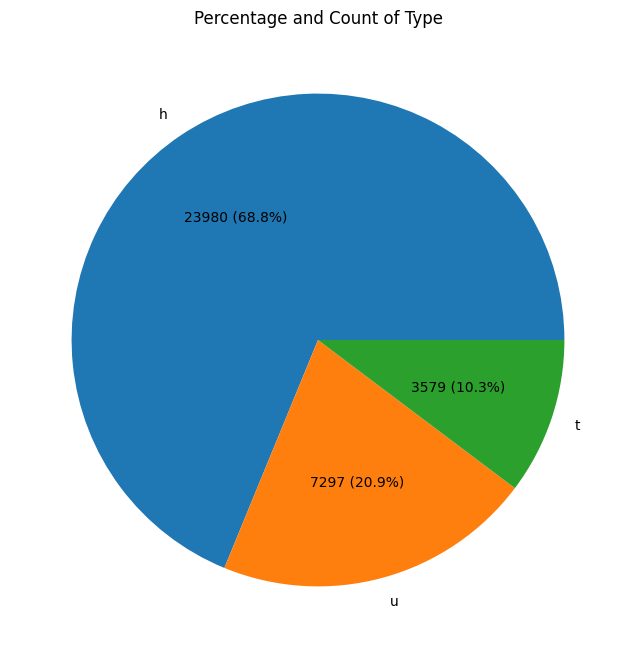

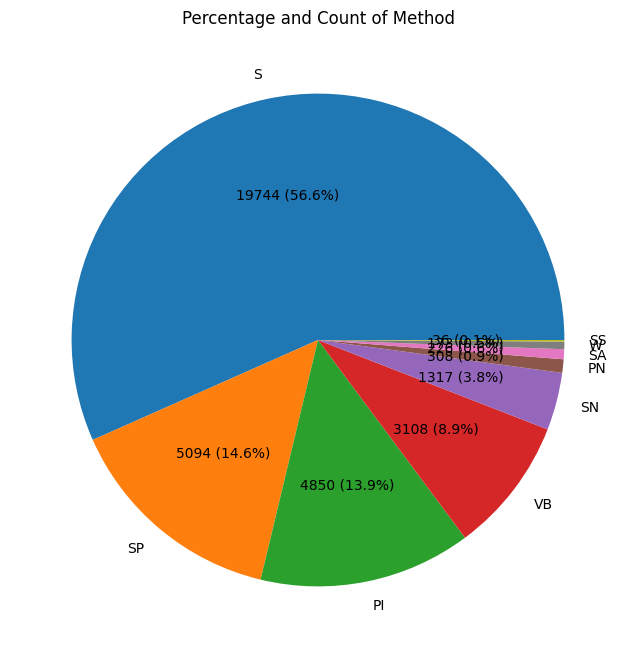

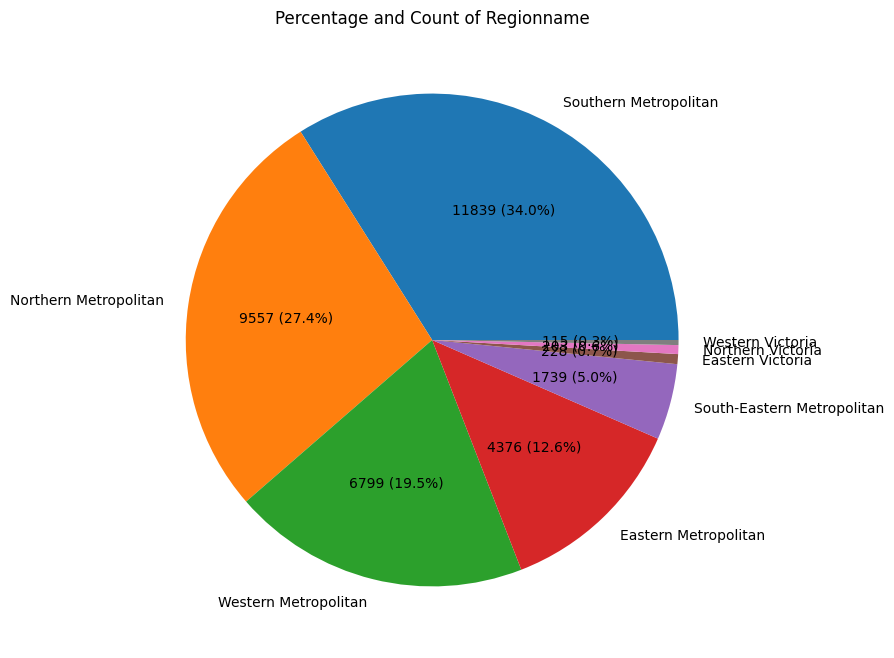

In [318]:
for c in categorical_features2:  # döngü başlatılıyor
    s = df[c].value_counts()    # kategorik değişkenlerin sayısı hesaplanır s ye aktarılıyor
    plt.figure(figsize=(8, 8))  ## grafik botu belirlendi
    plt.pie(s, labels=s.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(s) / 100, p)) # pasta grafiği oluşturduk ve kişi sayılarını yazdırdık
    plt.title(f'Percentage and Count of {c}')  # grafiğe isim verdik
    plt.show()

In [319]:
# daha okunaklı olsun diye değerleri liste şeklinde alalım
categorical_features2 = ['Type', 'Method', 'Regionname']

# Her bir kategorik değişken için yüzde değerlerini ve sayıları hesapla
percentage_lists = []

for c in categorical_features2:
    s = df[c].value_counts()
    percentages = s / s.sum() * 100  # Yüzde değerlerini hesapla
    percentage_lists.append((c, s.index, percentages))

# Yüzde değerlerini liste şeklinde yazdır
for category, labels, percentages in percentage_lists:
    print(f"Category: {category}")
    for label, percentage in zip(labels, percentages):
        print(f"{label}: {percentage:.1f}%")
    print("\n")

Category: Type
h: 68.8%
u: 20.9%
t: 10.3%


Category: Method
S: 56.6%
SP: 14.6%
PI: 13.9%
VB: 8.9%
SN: 3.8%
PN: 0.9%
SA: 0.6%
W: 0.5%
SS: 0.1%


Category: Regionname
Southern Metropolitan: 34.0%
Northern Metropolitan: 27.4%
Western Metropolitan: 19.5%
Eastern Metropolitan: 12.6%
South-Eastern Metropolitan: 5.0%
Eastern Victoria: 0.7%
Northern Victoria: 0.6%
Western Victoria: 0.3%




*   **Type:** Evlerin %68.8'i müstakil evlerden, %20.9'u dubleks ve %10.3'ü şehir evlerinden oluşuyor.

*   **Method:** Evlerin %56.6'sı satılmış, %14,6'sı daha önceden satılmış, %13.9'u devredilmiş, %8.9 satıcı tarafından teklif verilmiş, %3.8 satış fiyatı açıklanmamış, %0.9'u açık arttırma öncesi satılmış, %0.6'sı açık artırmadan sonra satılmış, %0.5'i artık açık arttırmadan önce çekildiyse, %0.1'i açık arttırmadan sonra satış fiyatı açıklanmamış.

*   **Regionname:** Evlerin %34'ü güney metropolünde, %27'si kuzey metropolünde, %19.5'i batı metropolünde, %12.6'sı doğu metropolünde, %5'i güneydoğu metropolünde, %0.7'si doğu viktoryada, %0.6'sı kuzey viktoryada, %0.3'ü batı viktoryada bulunmaktadır.

In [320]:
# ücretin diğer değişkenlerle arasındaki ilişkiye bakmak için grafik çizdireceğiz
# bazı başlıklar bizim için çok bir anlam ifade etmeyeceği için sadece işe yaraynları ayırdık
# regresyon doğrusu ile ilişkiye bakacağız
numerical_features = ['Rooms','Price', 'Distance','Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
numerical_features2= ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

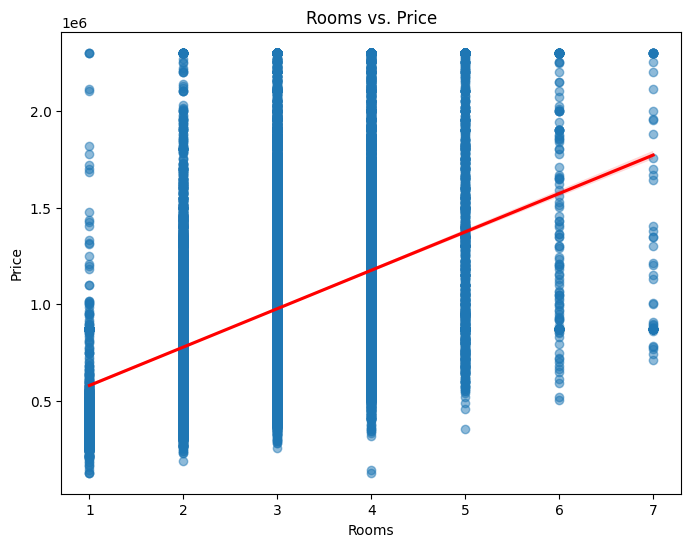

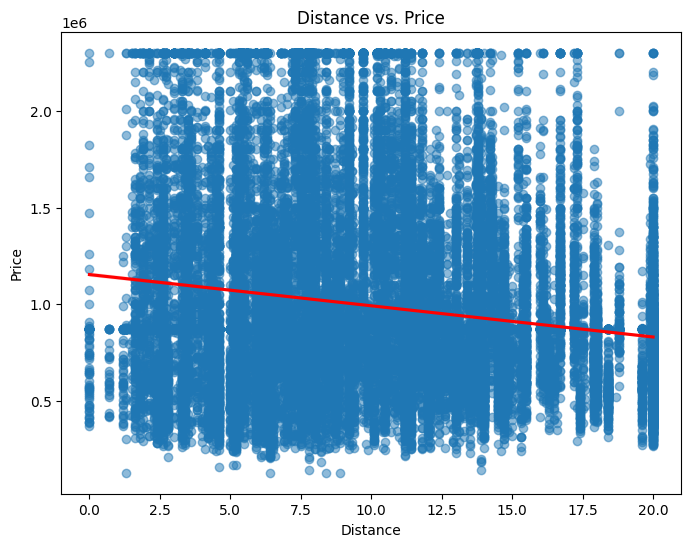

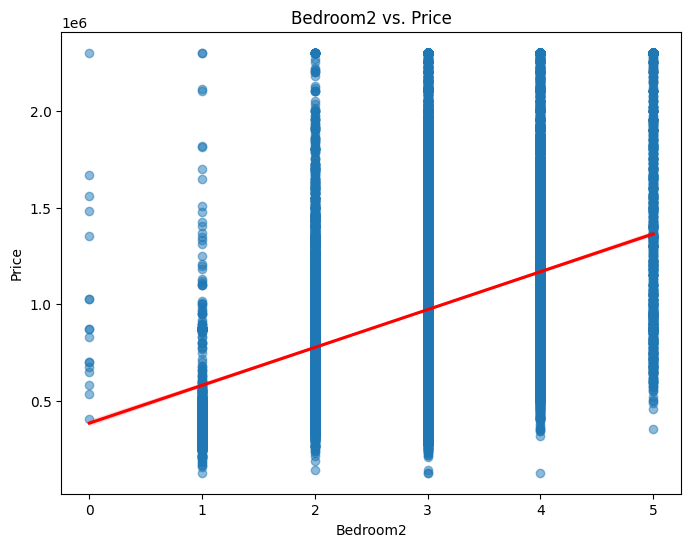

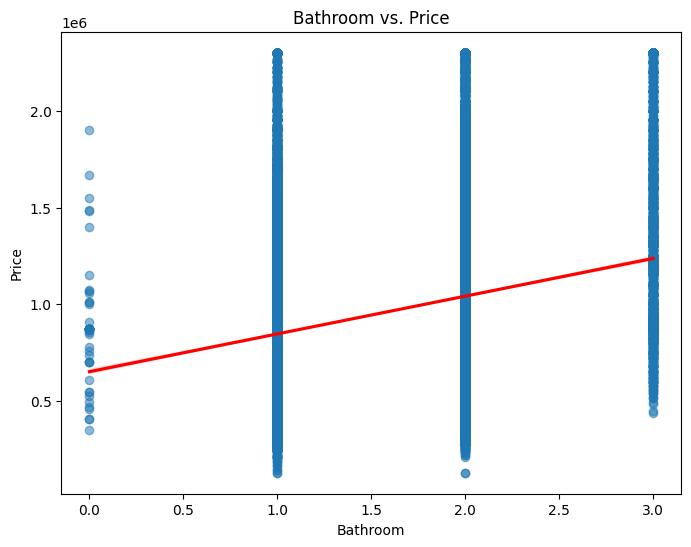

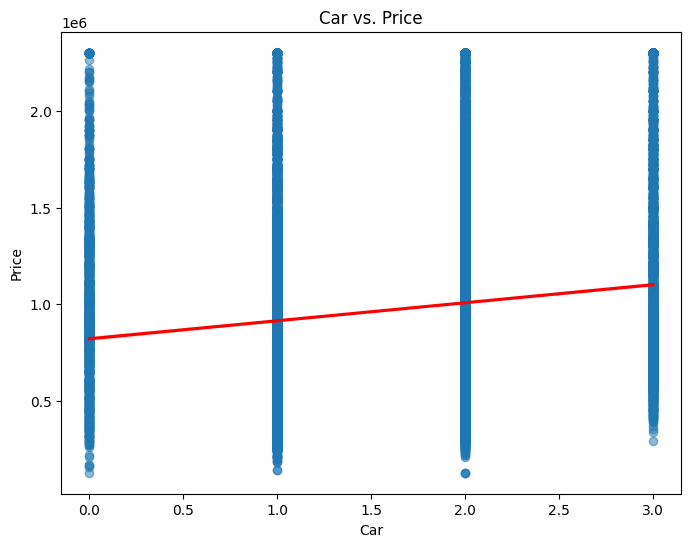

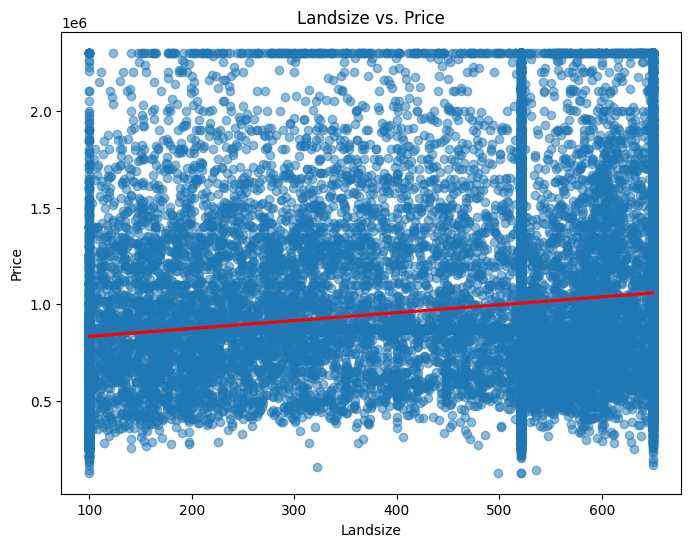

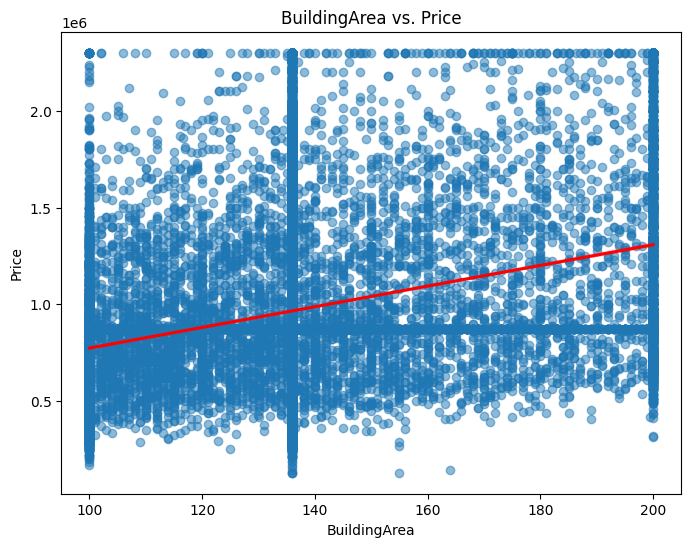

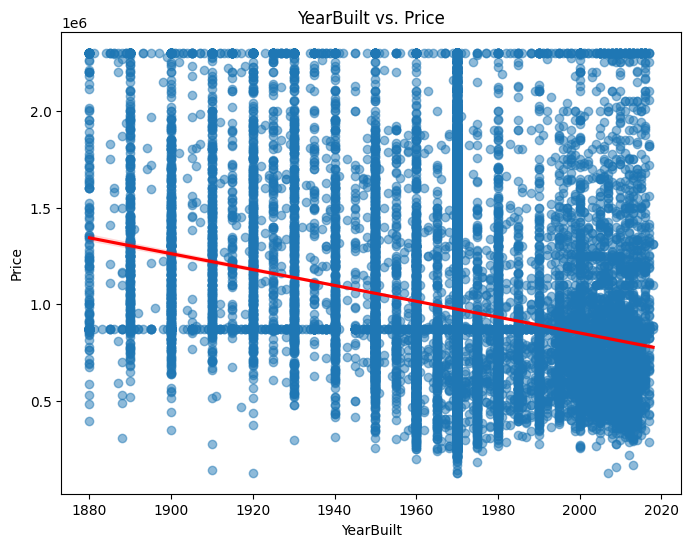

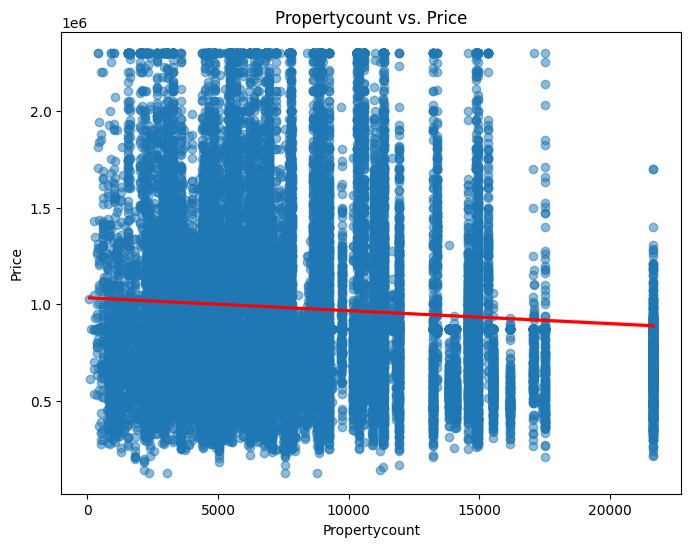

In [321]:
for feature in numerical_features2:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=feature, y='Price', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

*   **Rooms vs. Price:** beklenildiği gibi oda sayısı arttıkça evin fiyatıda artış gösteriyor.

*   **Distance vs. Price:** merkezden uzaklaştıkça ev fiyatları düşüş göstermiş.

*   **Bedroom2 vs. Price:** evde eksta oda olması eve değer katmış ve fiyatı arttırmış.

*   **Bathroom vs. Price:** evdeki banyo sayısı arttıkça fiyatta artış göstermiş.

*   **Car vs. Price:** park alanı arttıkça ev fiyatı ciddi boyutta olmasada artış göstermiştir.

*   **Landsize vs Price:** arazi büyüklüğü arttıkça evin fiyatı artış göstermiş.

*   **BuildingArea vs. Price:** evin m^2'si arttıkça fiyat artış göstermiş. bu artış landsize dan daha büyük demek ki insanlar arazi büyüklüğündense yaşam alanının büyüklüğüne daha çok dikkat ediyor.

*   **YearBuilt vs. Price:** ilginç bir şekilde yeni evlerin değeri eski evlere göre daha düşük.

*   **PropertyCount vs. Price:** mahalledeki mülk sayısı arttıkça fiyat düşüyor.



<ipython-input-322-35edbe35e13d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

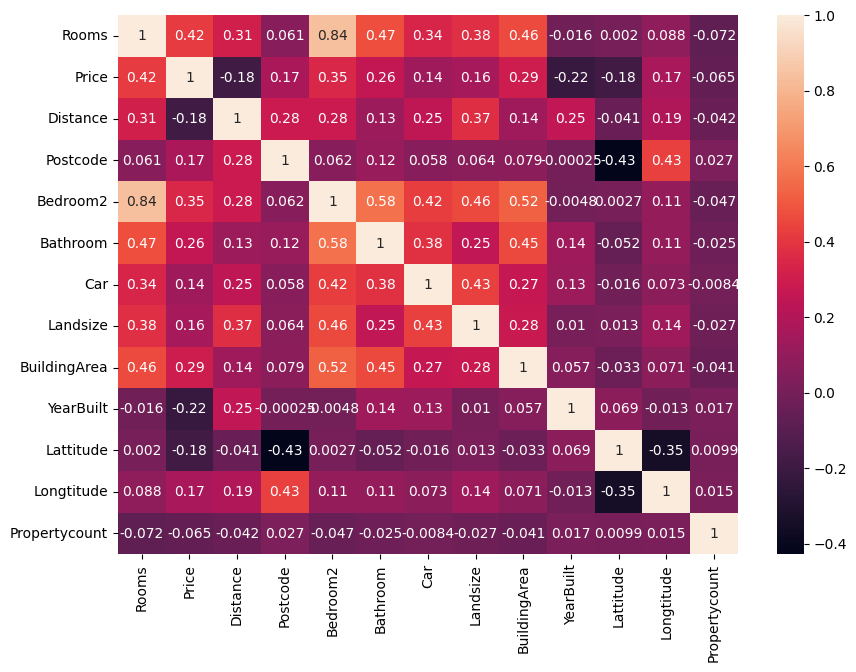

In [322]:
# korelasyon haitası oluşturup aralarındaki ilişkiye bakalım
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

*  Price 0.42 değeri ile en çok ilişkiyi rooms ile kurmuştur. Daha sonra ise 0.35 ile Bedroom2 ile ilişkilendirilmiştir. 0.29 ile de BuildingArea ile ilişkilidir. -0.22 ile en az ilişkiyi YearBuilt ile kurmuştur.

*  Korelasyon haritasının en ilişkili ikilisi Bedroom2 ile Rooms arasında kurulmuştur.

*  En ilişkisiz ikilide Postcode ve Lattitude arasındadır. Fakat Postcode Longtitude ile 0.43 gibi bir değer ile ilişki kurmuştur. Demek ki posta kodu belirlenirken boylam(Longtitude) değerleri göz önüne alınmış.

**Label Encoding ve One-Hot Encoding**

Type, Method, Regionname değişkenlerinin daha az sayıda alt başlığı olduğu için one hot encoding yöntemini kullancağız. Diğer taraftan Suburb ve Sellerg de çok fazla alt başlık olduğu için one hot encoding yöntemini kullanmayacağız. Kullandığımız takdirde bu değişkken veri tablosuna çok fazla sutün eklemiş olacak. Bunun yerine bu değişkenler için label encoding uygulayacağız. Değişkenlerin alt başlıklarını numaralar verip sıralayacağız.

In [323]:
# Pandas'ın get_dummies fonksiyonunu kullanarak One-Hot Encoding uygulayın
df = pd.get_dummies(df, columns=['Type'], prefix = 'Type', drop_first=True)
df = pd.get_dummies(df, columns=['Method'], prefix = 'Method', drop_first=True)
df = pd.get_dummies(df, columns=['Regionname'], prefix = 'Regionname', drop_first=True)

df.head()




,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,2,870000.0,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,870000.0,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,...,0,1,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [324]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding uygulanacak kategorik değişkenlerin listesini belirleyelim
label_encoding_features = ['Suburb', 'SellerG']

# Label Encoder nesnesini oluşturalım
label_encoder = LabelEncoder()

# Her bir kategorik değişkene Label Encoding uygulayalım
for feature in label_encoding_features:
    df[feature] = label_encoder.fit_transform(df[feature])

print(df[label_encoding_features].head())

   Suburb  SellerG
0       0      155
1       0       33
2       0       33
3       0      296
4       0       33


In [325]:
# bir sonraki adımlarda address, councilarea ve date değişkeni sorun çıkartacağı için kaldırıyoruz
df = df.drop(columns=['Address'])

In [326]:
df = df.drop(columns=['Date'])

In [332]:
df = df.drop(columns=['CouncilArea'])

# **Model Selection**

**Bağımlı (y) ve Bağımsız (X) Değişkenlerin Ayrılması**

In [333]:
y = df['Price']
X = df.drop(['Price'], axis = 1)

In [334]:
X

,Suburb,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,2,155,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,...,1,0,0,0,1,0,0,0,0,0
1,0,2,33,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,...,0,0,0,0,1,0,0,0,0,0
2,0,2,33,2.5,3067.0,2.0,1.0,0.0,156.0,100.0,...,0,0,0,0,1,0,0,0,0,0
3,0,3,296,2.5,3067.0,3.0,2.0,1.0,100.0,136.0,...,0,1,0,0,1,0,0,0,0,0
4,0,3,33,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,348,4,152,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34853,348,2,321,6.3,3013.0,2.0,2.0,1.0,100.0,104.0,...,0,0,0,0,0,0,0,0,1,0
34854,348,2,152,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,...,0,0,0,0,0,0,0,0,1,0
34855,348,3,370,6.3,3013.0,3.0,2.0,2.0,521.0,136.0,...,0,0,0,0,0,0,0,0,1,0


In [335]:
y

0         870000.0
1        1480000.0
2        1035000.0
3         870000.0
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 34856, dtype: float64

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Veriyi Ölçeklendirme**

Veriyi ölçeklendirmek, değişkenlerin farklı ölçeklerde olması durumunda model performansını artırabilir. Veriyi ölçeklendirmek için Min-Max Scaling veya Standard Scaling yöntemleri kullanılır.

Min-Max Scaling: Değerleri belirli bir aralığa (genellikle 0 ile 1 arasına) ölçeklendirir.

Standard Scaling: Değerleri ortalama sıfır ve standart sapma birim olacak şekilde ölçeklendirir.

In [337]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [347]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# Modellerin tanımlayalım
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# Her model için eğitim ve test işlemini gerçekleştirelim
for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)  # Modeli eğitiyoruz
    y_pred = model.predict(X_test)  # Modeli kullanarak tahminler yapıyoruz
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Hata metriği (RMSE) hesaplıyoruz
    print(f'{model_name}: RMSE = {rmse:.2f}')

Lasso: RMSE = 332268.51
LinearRegression: RMSE = 332268.44
Ridge: RMSE = 332269.70
ElasticNet: RMSE = 355618.86
KNeighborsRegressor: RMSE = 358232.26
RandomForestRegressor: RMSE = 293643.79
GradientBoostingRegressor: RMSE = 304728.85
AdaBoostRegressor: RMSE = 355093.79


#**Model Evaluation**


In [348]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modellerin performans metriklerini saklayacak liste oluşturyoruz
model_metrics = {}

for model_name, model_info in models.items():
    model = model_info['model']
    y_pred = model.predict(X_test)

    # MAE hesaplayalım
    mae = mean_absolute_error(y_test, y_pred)

    # MSE hesaplayalım
    mse = mean_squared_error(y_test, y_pred)

    # RMSE hesaplayalım
    rmse = np.sqrt(mse)

    # R-squared (R2) hesaplayalım
    r2 = r2_score(y_test, y_pred)

    # Metrikleri listeye ekleyelim
    model_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Her bir modelin performansını gösteelim
for model_name, metrics in model_metrics.items():
    print(f'{model_name}:')
    print(f'MAE: {metrics["MAE"]:.2f}')
    print(f'MSE: {metrics["MSE"]:.2f}')
    print(f'RMSE: {metrics["RMSE"]:.2f}')
    print(f'R2: {metrics["R2"]:.2f}')
    print()

# En iyi modeli seçelim (R2 skoru, bağımsız değişkenlerin bağımlı değişkeni ne kadar iyi açıkladığını ölçen bir metriktir)
best_model_name = max(model_metrics, key=lambda k: model_metrics[k]['R2'])
best_model = models[best_model_name]['model']

print(f'Best Model: {best_model_name}')
print(f'R2 for Best Model: {model_metrics[best_model_name]["R2"]:.2f}')

Lasso:
MAE: 247875.27
MSE: 110402364480.48
RMSE: 332268.51
R2: 0.47

LinearRegression:
MAE: 247876.54
MSE: 110402316365.01
RMSE: 332268.44
R2: 0.47

Ridge:
MAE: 247867.30
MSE: 110403151931.49
RMSE: 332269.70
R2: 0.47

ElasticNet:
MAE: 264350.46
MSE: 126464775337.28
RMSE: 355618.86
R2: 0.40

KNeighborsRegressor:
MAE: 253893.99
MSE: 128330352977.03
RMSE: 358232.26
R2: 0.39

RandomForestRegressor:
MAE: 196683.17
MSE: 86226676935.91
RMSE: 293643.79
R2: 0.59

GradientBoostingRegressor:
MAE: 218133.03
MSE: 92859669640.44
RMSE: 304728.85
R2: 0.56

AdaBoostRegressor:
MAE: 273042.60
MSE: 126091598786.98
RMSE: 355093.79
R2: 0.40

Best Model: RandomForestRegressor
R2 for Best Model: 0.59




*   En iyi model RandomForest oldu. R2 skoru=0.59 çıktı.
*   Price değişkenindeki değerleri doldurmak yerine kaldırsaydık skor daha yüksek çıkabilirdi fakat gerçek dünya verisi olduğu için dokunmak istemedim.

